In [11]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [12]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


In [22]:
# Generate random data
np.random.seed(42)
data_sizes = [100, 500, 1000, 5000, 10000]
results = []

for size in data_sizes:
    data = np.random.randint(0, 1000, size=size)

    # Measure time for Bubble Sort
    start_time = time.time()
    bubble_sort(data.copy())
    bubble_time = time.time() - start_time

    # Measure time for Quick Sort
    start_time = time.time()
    quick_sort(data.copy())
    quick_time = round(time.time() - start_time)

    # Append results
    results.append(['Bubble Sort', size, bubble_time])
    results.append(['Quick Sort', size, quick_time])

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['Algorithm', 'Data Size', 'Time'])
df.head()


,Algorithm,Data Size,Time
0,Bubble Sort,100,0.008681
1,Quick Sort,100,0.000000
2,Bubble Sort,500,0.239014
3,Quick Sort,500,0.000000
4,Bubble Sort,1000,1.221791


from matplotlib import pyplot as plt
_df_0['Data Size'].plot(kind='hist', bins=20, title='Data Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Data Size', y='Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Data Size']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Data Size'}, axis=1)
              .sort_values('Data Size', ascending=True))
  xs = counted['Data Size']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Data Size', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Algorithm')):
  _plot_series(series, series_name, i)
  fig.legend(title='Algorithm', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data Size')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Algorithm')):
  _plot_series(series, series_name, i)
  fig.legend(title='Algorithm', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Data Size'].plot(kind='line', figsize=(8, 4), title='Data Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='Data Size', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Time', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

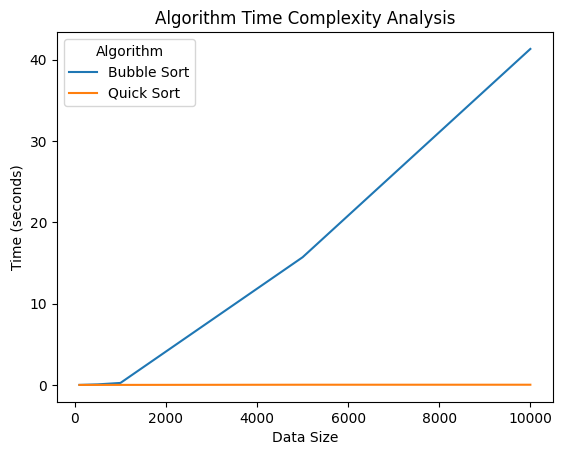

In [15]:
# Plot the results
sns.lineplot(data=df, x='Data Size', y='Time', hue='Algorithm')
plt.title('Algorithm Time Complexity Analysis')
plt.xlabel('Data Size')
plt.ylabel('Time (seconds)')
plt.show()


In [16]:
# Feature Engineering: Efficiency Score
def efficiency_score(time, data_size):
    return data_size / time

df['Efficiency Score'] = df.apply(lambda row: efficiency_score(row['Time'], row['Data Size']), axis=1)
df.head()


,Algorithm,Data Size,Time,Efficiency Score
0,Bubble Sort,100,0.002419,41339.483540
1,Quick Sort,100,0.000576,173461.703888
2,Bubble Sort,500,0.068369,7313.214443
3,Quick Sort,500,0.001547,323185.698875
4,Bubble Sort,1000,0.244607,4088.190917


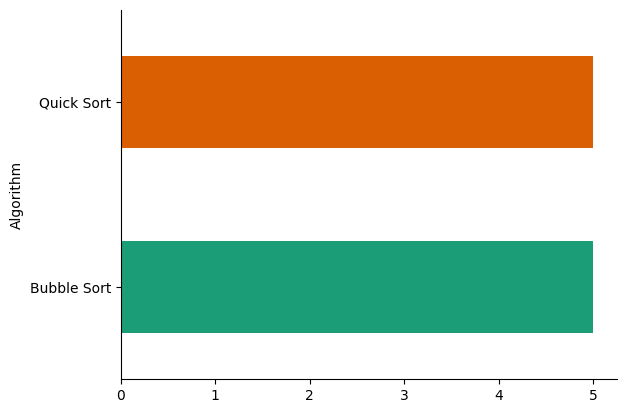

In [21]:
# @title Algorithm

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
X = df[['Data Size']]
y = df['Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 670.094283838215
R-squared: -0.5698564232019381


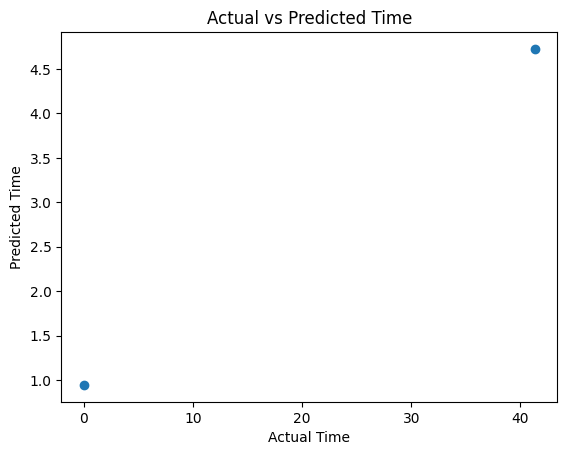

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Time')
plt.ylabel('Predicted Time')
plt.title('Actual vs Predicted Time')
plt.show()
